In [1]:
import numpy as np  
from enum import Enum

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# ipynbのインポート
import nbimporter
from common_data import get_calendar

Importing Jupyter notebook from common_data.ipynb


# 家電

## 4.　テレビ

### 4.1　定義 

テレビの動作状態および機能は、以下を想定する。

* 稼働－テレビ  
* 待機

想定する動作状態および機能に対応する添え字は、以下のとおりである。ただし、単機能であるため、機能に対応する添え字は省略する。  

|機器の動作状態 |機器の機能 |添え字 |備考 |  
|:-------------:|:---------:|:-----:|:---:|      
|稼働           |テレビ     |opg    |-    |  
|待機           |-　　    　|sby    |-    |  

### 4.2　消費電力量

日付$d$の時刻$t$におけるテレビの消費電力量$E_{E,Television,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    E_{E,Television,d,t} = E_{E,opg,d,t} + E_{E,sby,d,t}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,Television,d,t}$：日付$d$の時刻$t$におけるテレビの単位時間当たりの消費電力量[Wh]  
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,sby,d,t}$：日付$d$の時刻$t$における待機時の単位時間当たりの消費電力量[Wh]  

である。

In [2]:
def EE_app (EE_opg, EE_sby):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時の消費電力量[Wh]
    # EE_sby：待機時の消費電力量[Wh]
    
    return EE_opg + EE_sby

日付$d$の時刻$t$における稼働時および待機時の消費電力量は、式(2)および式(3)により計算される。

<p style="text-indent:2em">稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,d,t} = P_{opg} \times dt_{opg,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

<p style="text-indent:2em">待機時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,sby,d,t} = P_{sby} \times dt_{sby,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (3) </div>

ただし、式(4)を満たす。  

$$ 
\begin{equation*}
    dt_{opg,d,t} +dt_{sby,d,t} = dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (4) </div>

ここで、  

$dt_{calc}$：単位時間[s]   
$dt_{opg,d,t}$：日付$d$の時刻$t$における稼働時間の合計[s]  
$dt_{sby,d,t}$：日付$d$の時刻$t$における待機時間の合計[s]   
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,sby,d,t}$：日付$d$の時刻$t$における待機時の単位時間当たりの消費電力量[Wh]   
$P_{opg}$：稼働時の消費電力[W]  
$P_{sby}$：待機時の消費電力[W]  

である。

In [3]:
def EE_opg (P_opg, dt_opg):
    '''稼働時の消費電力量[Wh]を計算する'''
    # P_opg：稼働時の消費電力[W] 
    # dt_opg：稼働時間の合計[s]
  
    return P_opg * dt_opg / 3600

In [4]:
def EE_sby (P_sby, dt_sby):
    '''待機時の消費電力量[Wh]を計算する'''
    # P_sby：待機時の消費電力[W]
    # dt_sby：待機時間の合計[s]
 
    return P_sby * dt_sby / 3600

In [5]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    # dt_calc：単位時間[s]
    
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc != dt_sum:
        # 単位時間と異なる => エラー
        try:
            raise Exception('機器動作スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 4.3　稼働時の消費電力

日付$d$の時刻$t$における稼働時の消費電力は、式(5)により計算される。

<p style="text-indent:2em">稼働時の消費電力：</p>  
$$ 
\begin{equation*}
    P_{opg} = 0.8579 \times P_{rtd,opg} 
\end{equation*}
$$

<div style="text-align: right;"> (5) </div>

ここで、   

$P_{opg}$：稼働時の消費電力[W]  
$P_{rtd,opg}$：定格消費電力[W]  

である。

In [6]:
def P_opg (Prtd_opg):
    """稼働時の消費電力[W]を計算する""" 
    # Prtd_opg：定格消費電力[W]
    
    return 0.8579 * Prtd_opg

### 4.4　待機時の消費電力

日付$d$の時刻$t$における待機時の消費電力は、式(6)により計算される。

<p style="text-indent:2em">待機時の消費電力：</p>  
$$ 
\begin{equation*}
    P_{sby} = P_{rtd,sby} 
\end{equation*}
$$

<div style="text-align: right;"> (6) </div>

ここで、   

$P_{rtd,sby}$：待機時消費電力[W]  
$P_{sby}$：待機時の消費電力[W]  

である。

In [7]:
def P_sby (Prtd_sby):
    """待機時の消費電力[W]を計算する""" 
    # Prtd_sby：待機時消費電力[W]
    
    return Prtd_sby

### 4.5　標準条件

#### 4.5.1　機器仕様

4人世帯の標準的な機器仕様として、下表の設定を用いることができる。

| 番号 | 定格消費電力[W] | 待機時消費電力[W] | 画面タイプ | 画面サイズ | 一般型/省エネ型の別 | 製造年度 | 備考                         |  
|:----:| :-------------: | :---------------: | :--------: | :--------: | :-----------------: | :------: | :--------------------------: |  
|  00  | 125             | 0.15              | 液晶       | 37V        | 一般型              | 2011年度 | 4人標準世帯（居間）の既定値  |  
|  01  |  72             | 不明                 | 液晶       | 37V        | 省エネ型            | 2011年度 | -                            |  
|  02  | 172             | 0.15              | 液晶       | 60V        | 省エネ型            | 2011年度 | -                            |    
|  03  | 133             | 0.1               | 液晶       | 46V        | 省エネ型            | 2011年度 | -                            |    
|  04  | 193             | 0.1               | 液晶       | 37V        | 省エネ型            | 2011年度 | -                            |    
|  05  |  53             | 0.1               | 液晶       | 32V        | 省エネ型            | 2011年度 | -                            |    
|  06  |  63             | 0.367             | 液晶       | 26V        | 一般型              | 2011年度 | 4人標準世帯（洋室1）の既定値 |    

In [8]:
Spec  = {
    'TV00' : {
        'Prtd_opg' : 125,
        'Prtd_sby' : 0.15
    }, 
    'TV01' : {
        'Prtd_opg' : 72,
        'Prtd_sby' : 0
    },
    'TV02' : {
        'Prtd_opg' : 172,
        'Prtd_sby' : 0.15
    },
    'TV03' : {
        'Prtd_opg' : 133,
        'Prtd_sby' : 0.1
    },
    'TV04' : {
        'Prtd_opg' : 193,
        'Prtd_sby' : 0.1
    },
    'TV05' : {
        'Prtd_opg' : 63,
        'Prtd_sby' : 0.1
    },
    'TV06' : {
        'Prtd_opg' : 53,
        'Prtd_sby' : 0.367
    }
}

#### 4.5.2　機器動作スケジュール

4人世帯の標準的なスケジュールとして、下表の設定を用いることができる。

| 番号 | スケジュール名称    | 備考 |
|:---: | :-----------------: | :--: |
|  00  | 4人標準世帯（居間） | -    |
|  01  | 4人標準世帯（洋室1）| -    |

<p style="text-indent:2em">居間：</p>  

<p style="text-indent:4em">平日：</p>  

|時刻              |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:             | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s] |  0|  0|  0|  0|  0|  0|  0| 60| 60| 60|  0|  0| 60|  0|  0|  0|  0| 60| 60| 60| 60| 60| 30|  0|  
|待機時間[\* 60 s] | 60| 60| 60| 60| 60| 60| 60|  0|  0|  0| 60| 60|  0| 60| 60| 60| 60|  0|  0|  0|  0|  0| 30| 60| 

<p style="text-indent:4em">休日在宅：</p>  

|時刻              |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:             | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|  0| 60| 60| 60| 60|  0|  0|  0|  0| 45|  0| 60|  0|  0|  0|  0| 60|  
|待機時間[\* 60 s] | 60| 60| 60| 60| 60| 60| 60| 60|  0|  0|  0|  0| 60| 60| 60| 60| 15| 60|  0| 60| 60| 60| 60|  0| 

<p style="text-indent:4em">休日外出：</p>  

|時刻              |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:             | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s] |  0|  0|  0|  0|  0|  0|  0| 60| 60|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 60|  0|  0|  
|待機時間[\* 60 s] | 60| 60| 60| 60| 60| 60| 60|  0|  0| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0|  0| 60| 60| 

<p style="text-indent:2em">洋室1：</p>  

<p style="text-indent:4em">平日：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60|  0|  0|  0|  0|  0|  
|待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0| 60| 60| 60| 60| 60| 

<p style="text-indent:4em">休日在宅：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 60| 60|  0|  0|  0|  0|  0|  
|待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0|  0|  0| 60| 60| 60| 60| 60| 

<p style="text-indent:4em">休日外出：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 45|  0|  0|  
|待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0| 15| 60| 60| 

In [9]:
class RoomType(Enum):
    LivingRoom = 'LivingRoom' # 居間
    ChildRoom1 = 'ChildRoom1' # 洋室1

In [10]:
Schedule= {
    'LivingRoom' : {
        'Weekdays' : {
            'opg' : [0]   *7 + [3600]*3 + [0]   *2 + [3600]*1 + [0]   *4 + [3600]*5 + [1800]*1 + [0]   *1,
            'sby' : [3600]*7 + [0]   *3 + [3600]*2 + [0]   *1 + [3600]*4 + [0]   *5 + [1800]*1 + [3600]*1
        },
        'Holidays_st' : {
            'opg' : [0]   *8 + [3600]*5 + [0]   *3 + [2700]*1 + [3600]*6 + [0]   *1,
            'sby' : [3600]*8 + [0]   *5 + [3600]*3 + [900] *1 + [0]   *6 + [3600]*1
        },
        'Holidays_go' : {
            'opg' : [0]   *7 + [3600]*2 + [0]   *11 + [3600]*2 + [0]   *2,
            'sby' : [3600]*7 + [0]   *2 + [3600]*11 + [0]   *2 + [3600]*2
        }
    },
     'ChildRoom1' : {
        'Weekdays' : {
            'opg' :  [0]   *18 + [3600]*1 + [0]   *5,
            'sby' :  [3600]*18 + [0]   *1 + [3600]*5
        },
        'Holidays_st' : {
            'opg' : [0]   *16 + [3600]*3 + [0]   *5,
            'sby' : [3600]*16 + [0]   *3 + [3600]*5
        },
        'Holidays_go' : {
            'opg' : [0]   *20 + [3600]*1 + [2700]*1 + [0]   *2,
            'sby' : [3600]*20 + [0]   *1 + [900] *1 + [3600]*2
        }
    }
}

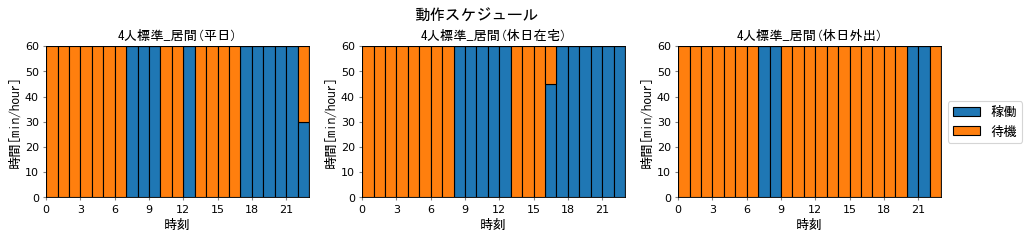

In [11]:
# 機器動作スケジュールの確認  
chart_title = '動作スケジュール'
schedule_name = ('LivingRoom','4人標準_居間' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働'), ('sby','待機') ]

y_value_sets = Schedule[schedule_name[0]] 


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = np.array(y_values[app_status_type[0]]) / 60
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 70, 10), minor=False)
    ax.set_ybound(lower=0, upper=60)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

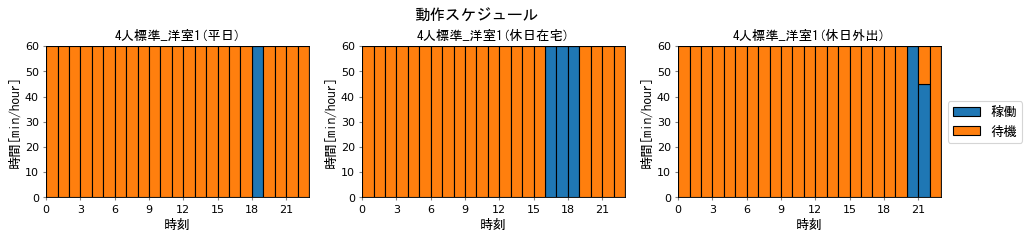

In [12]:
# 機器動作スケジュールの確認  
chart_title = '動作スケジュール'
schedule_name = ('ChildRoom1','4人標準_洋室1' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働'), ('sby','待機') ]

y_value_sets = Schedule[schedule_name[0]] 


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = np.array(y_values[app_status_type[0]]) / 60
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 70, 10), minor=False)
    ax.set_ybound(lower=0, upper=60)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録1：サンプルコード

4人標準世帯の標準条件について、サンプルコードを示す。

In [13]:
def get_spec(app_type):
    '''機器仕様を取得する'''
    # app_type：機器タイプ
    
    # 機器仕様の取得
    try:
        spec = Spec[app_type]
    except:
        raise Exception('機器タイプの入力に不正があります。')     
    
    Prtd_opg = spec['Prtd_opg']
    Prtd_sby = spec['Prtd_sby']
    
    return Prtd_opg, Prtd_sby

Example:

In [14]:
ex_Prtd_opg, ex_Prtd_sby = get_spec('TV00')
ex_Prtd_opg, ex_Prtd_sby

(125, 0.15)

In [15]:
def get_dt(time_use_type, time_of_day, schedule_name):
    '''機器動作スケジュールを取得する'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23）
    # schedule_name：スケジュール名
     
    # スケジュールの取得
    try:
        schedule_set = Schedule[schedule_name][time_use_type]
    except:
        raise Exception('スケジュール名の入力に不正があります。')    
               
    # 動作状態のタイプ
    app_status_types = list(schedule_set)
    
    # 動作状態ごとの継続時間[s]の取得
    for i, app_status_type in enumerate(app_status_types):
        if app_status_type == 'opg':
            dt_opg = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'sby':
            dt_sby = schedule_set[app_status_type][time_of_day]
        else:
            raise Exception
            
    # 時間超過の確認
    check_duration([dt_opg, dt_sby]) 
    
    return dt_opg, dt_sby

Example:

In [16]:
ex_dt_opg, ex_dt_sby = get_dt('Weekdays', 7, 'LivingRoom')
ex_dt_opg, ex_dt_sby

(3600, 0)

In [17]:
def calc_EE_opg(Prtd_opg, dt_opg):
    '''稼働時における消費電力量[Wh]を計算する'''
    # Prtd_opg：定格消費電力[W]
    # dt_opg：稼働時間の合計[s]
    
    # 稼働時の消費電力[W]
    p_opg = P_opg (Prtd_opg)
       
    # 稼働時における消費電力量[Wh]
    ee_opg = EE_opg(p_opg, dt_opg)
    
    return ee_opg

Example:

In [18]:
ex_EE_opg = calc_EE_opg(ex_Prtd_opg, ex_dt_opg)
ex_EE_opg

107.2375

In [19]:
def calc_EE_sby(Prtd_sby, dt_sby):
    '''稼働時における消費電力量[Wh]を計算する'''
    # Prtd_sby：待機時消費電力[W] 
    # dt_sby：待機時間の合計[s]
    
    # 稼働時の消費電力[W]
    p_sby = P_sby (Prtd_sby)
       
    # '稼働時における消費電力量[Wh]
    ee_sby = EE_sby(p_sby, dt_sby)
    
    return ee_sby

Example:

In [20]:
ex_EE_sby = calc_EE_sby(ex_Prtd_sby, ex_dt_sby)
ex_EE_sby

0.0

In [21]:
def calc_EE_app(EE_opg, EE_sby):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時における消費電力量[Wh]
    # EE_sby：待機時における消費電力量[Wh]
    
    return EE_app(EE_opg, EE_sby)

Example:

In [22]:
ex_EE_app = calc_EE_app(ex_EE_opg, ex_EE_sby)
ex_EE_app

107.2375

In [23]:
def calc_EE_Television_verP4(time_use_type, time_of_day, app_type, schedule_name):
    '''テレビの単位時間当たりの消費電力量を計算する（ver自立P4）'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23） 
    # app_type：機器タイプ  
    # schedule_name：スケジュール名['LivingRoom', 'ChildRoom1']
    
    # 機器動作スケジュール[s]を取得
    dt_opg, dt_sby = get_dt(time_use_type, time_of_day, schedule_name)
    
    # 機器仕様を取得
    Prtd_opg, Prtd_sby = get_spec(app_type)
    
    # 稼働時における消費電力量[Wh]を計算
    EE_opg = calc_EE_opg(Prtd_opg, dt_opg)
    
    # 待機時における消費電力量[Wh]を計算
    EE_sby = calc_EE_sby(Prtd_sby, dt_sby)
    
    # 消費電力量[Wh]を計算
    EE_app = calc_EE_app (EE_opg, EE_sby)
    
    return EE_app, EE_opg, EE_sby

Example:

In [24]:
ex_EE_Television = calc_EE_Television_verP4('Weekdays', 7, 'TV00', 'LivingRoom')
ex_EE_Television

(107.2375, 107.2375, 0.0)

### 付録2：サンプルコードによる時刻別消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより平日、休日在宅、休日外出の時刻別消費電力量を計算した結果を示す。

In [25]:
# 消費電力量の計算
# 入力
time_use_type = [['Weekdays'], ['Holidays_st'], ['Holidays_go']]
time_of_day = [i for i in range(0, 24, 1)]
app_type = 'TV00'
schedule_name = 'LivingRoom'

# 消費電力量の計算
ee_app, ee_opg, ee_sby = np.vectorize(calc_EE_Television_verP4)(time_use_type, time_of_day, app_type, schedule_name)

# 消費電力量の計算結果
EE_Results= {
    'Weekdays' : {
        'opg' : ee_opg[0],
        'sby' : ee_sby[0]
    },
    'Holidays_st' : {
        'opg' : ee_opg[1],
        'sby' : ee_sby[1]
    },
    'Holidays_go' : {
        'opg' : ee_opg[2],
        'sby' : ee_sby[2]
    }
}

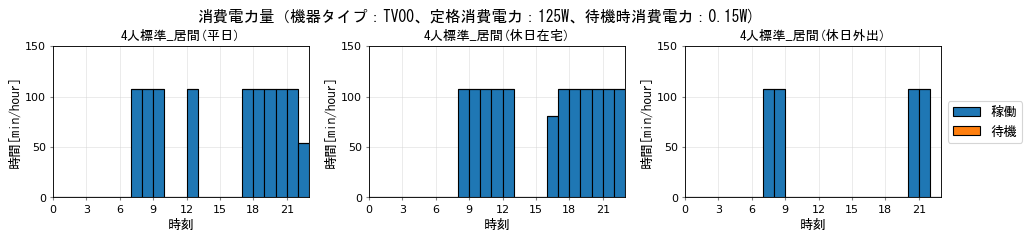

In [26]:
# 消費電力量の計算結果のグラフ
chart_title = '消費電力量（' \
                + '機器タイプ：' + app_type + '、' \
                + '定格消費電力：' + str(Spec[app_type]['Prtd_opg']) + 'W、' \
                + '待機時消費電力：' + str(Spec[app_type]['Prtd_sby'])+ 'W' \
                + ')'
schedule_name = ('LivingRoom','4人標準_居間' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働'), ('sby','待機') ]

y_value_sets = EE_Results


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 200, 50), minor=False)
    ax.set_ybound(lower=0, upper=150)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

In [27]:
# 消費電力量の計算
# 入力
time_use_type = [['Weekdays'], ['Holidays_st'], ['Holidays_go']]
time_of_day = [i for i in range(0, 24, 1)]
app_type = 'TV06'
schedule_name = 'ChildRoom1'

# 消費電力量の計算
ee_app, ee_opg, ee_sby = np.vectorize(calc_EE_Television_verP4)(time_use_type, time_of_day, app_type, schedule_name)

# 消費電力量の計算結果
EE_Results= {
    'Weekdays' : {
        'opg' : ee_opg[0],
        'sby' : ee_sby[0]
    },
    'Holidays_st' : {
        'opg' : ee_opg[1],
        'sby' : ee_sby[1]
    },
    'Holidays_go' : {
        'opg' : ee_opg[2],
        'sby' : ee_sby[2]
    }
}

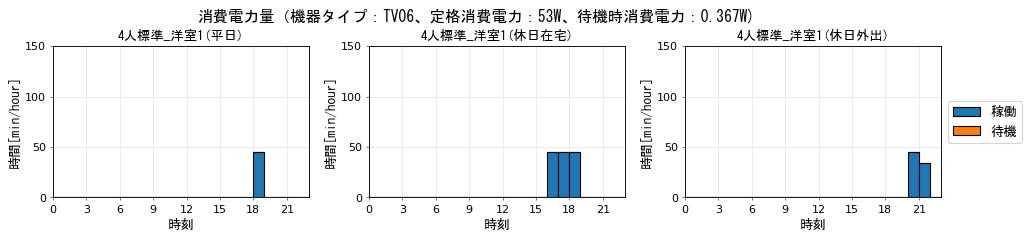

In [28]:
# 消費電力量の計算結果のグラフ  
chart_title = '消費電力量（' \
                + '機器タイプ：' + app_type + '、' \
                + '定格消費電力：' + str(Spec[app_type]['Prtd_opg']) + 'W、' \
                + '待機時消費電力：' + str(Spec[app_type]['Prtd_sby'])+ 'W' \
                + ')'
schedule_name = ('ChildRoom1','4人標準_洋室1' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働'), ('sby','待機') ]

y_value_sets = EE_Results


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 200, 50), minor=False)
    ax.set_ybound(lower=0, upper=150)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録3：サンプルコードによる年間消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより年間消費電力量を計算した結果を示す。

In [29]:
def calc_annual_EE_app(app_type, schedule_name):
    '''年間消費電力量[Wh/year]を計算する'''
    # app_type：機器タイプ  
    # schedule_name：スケジュール名  
       
    def calc_daily_EE_app(schedule, app_type, schedule_name):
        '''1日あたりの消費電力量[Wh/day]を計算する'''
        hourly_EE_app = [ calc_EE_Television_verP4(schedule, t, app_type, schedule_name)[1] for t in range(0, 24, 1) ]
        return sum( hourly_EE_app )
    
    daily_EE_app = [ calc_daily_EE_app(schedule, app_type, schedule_name) for schedule in get_calendar() ]
    return sum( daily_EE_app )

In [30]:
# 年間消費電力量[kWh/year]：居間
ex_annual_EE_app = calc_annual_EE_app('TV00', 'LivingRoom')
print('年間消費電力量：' + str(ex_annual_EE_app/1000) + ' kWh/年')

年間消費電力量：374.41973124999953 kWh/年


In [31]:
# 年間消費電力量[kWh/year]：洋室1
ex_annual_EE_app = calc_annual_EE_app('TV06', 'ChildRoom1')
print('年間消費電力量：' + str(ex_annual_EE_app/1000) + ' kWh/年')

年間消費電力量：25.257862850000073 kWh/年
